## Battle of Neighborhoods

A friend want's to open a juice bar in a city of the United States and is asking us for a recommendation. 
This is a typical task that future bar operators have to face. 

For our Battle of Neighborhoods we use this table of contents:
1. Introduction	
2. Data and Source	
3. Methodology	
4. Results 
5. Discussion	
6. Conclusion	


Now let's have a look into each step.

### 1. Introduction

Since this friend has only committed to opening a juice bar in a major American city, there is still a lot of room to decide.

A few preliminary considerations are necessary for our analysis:
- Freshly squeezed juices probably taste best as a refreshment when the weather is very warm and you need to cool down. 
- In addition, it would be ideal if we could not only operate a seasonal business at our future location due to cold winter months, but find ideal weather conditions all year round.

For our analysis, we deduce that our sought-after city should have the highest average temperature in the United States. This allows us to ensure that the juice bar can operate year-round. 

After we have found our target city in a macro analysis, we can move down one level. Our task in this step is to find a suitable area within this city. This is characterized by the fact that there are not already countless other juice bars to be found there. 


### 2. Data and Source

To answer this question we use some public data sources.

Wikipedia provides us with an overview of many cities all over the world with associated, average annual temperatures (see: https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature). 
Furthermore, it provides us with an overview of the Neighborhoods with associated coordinates within these cities, which are important for the microanalysis to identify already existing juice bars.

Using a Foursquare API we are able to find already existing bars, restaurants and other kinds of venues.


### 3. Methodology

Basics are a Notebook within the IBM Watson Studio. We use Python as scripting language to perform our analysis.

The Matplot library is used to visualize the results, as well as Folium to draw diagrams and maps. 

Nominatim from geopy.geocoders helps us to find geo-coordinates for the selected city.

Furthermore, we use Foursquare APIs to find already existing bars, restaurants and other kinds of venues.

Finally, the neigborhoods are clustered using the k-means algorithm. This helps us to find a neighborhood that may not yet have any or only a few juice bars, but has the identical cluster and thus turns out to be a suitable location.

### 4. Results and Discussion / 5. Conclusion

For these sections, the analysis must first be performed. 

## Step 0
First step is to import necessary libraries.

In [260]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


## Step 1:

To open a juicebar we first have a look at the average temperatures in the cities of the United States. To find a suitable location, we choose the city with the highest average temperature. Therefore we use a wikipedia list as data source.

We read the list and save it in a panda dataframe, filtered by cities in the United States. We split the necessary values in column "Year" to get the average temperature (in °C) for every city. 

In [261]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature'

df = pd.read_html(wiki_url)[3]
df_Temperatures = df.loc[(df.Country == "United States") & (df.Year.str[0] != '−')]
value = df_Temperatures['Year'].str.split('(').str[0].astype(float)
df_Temperatures.loc[:,'Avg_C_Year'] = value 
df_Temperatures


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Ref.,Avg_C_Year
47,United States,Albuquerque,2.4(36.4),5.2(41.4),8.9(48.1),13.3(56.0),18.7(65.6),23.8(74.9),25.7(78.3),24.6(76.2),20.7(69.3),14.2(57.5),7.2(44.9),2.4(36.3),14.0(57.2),[296],14.0
48,United States,Anchorage,−8.3(17.1),−6.6(20.2),−3.0(26.6),2.7(36.8),8.8(47.8),12.9(55.2),14.9(58.8),13.7(56.7),9.2(48.6),1.6(34.8),−5.4(22.2),−7.2(19.0),2.8(37.1),[297],2.8
49,United States,Atlanta,6.4(43.5),8.6(47.4),12.6(54.6),16.7(62.1),21.3(70.3),25.2(77.4),26.9(80.4),26.4(79.5),23.1(73.5),17.4(63.4),12.3(54.1),7.5(45.5),17.0(62.6),[298],17.0
50,United States,Austin,10.8(51.5),12.8(55.0),16.5(61.7),20.7(69.2),24.8(76.6),27.9(82.2),29.4(85.0),29.9(85.8),26.7(80.0),21.8(71.2),16.1(61.0),11.4(52.5),20.7(69.3),[299],20.7
51,United States,Baltimore,0.8(33.5),2.4(36.4),6.8(44.2),12.4(54.3),17.6(63.6),22.8(73.0),25.3(77.6),24.3(75.7),20.2(68.4),13.7(56.7),8.3(47.0),2.9(37.3),13.1(55.6),[300],13.1
52,United States,Boise,−0.4(31.3),2.5(36.5),6.9(44.5),10.4(50.8),15.1(59.1),19.7(67.5),24.3(75.8),23.7(74.7),18.3(64.9),11.6(52.8),4.4(40.0),−0.7(30.7),11.4(52.5),[301],11.4
53,United States,Boston,−1.5(29.3),0.0(32.0),3.7(38.6),9.1(48.4),14.6(58.2),20.0(68.0),23.2(73.7),22.4(72.4),18.4(65.2),12.4(54.3),7.2(45.0),1.7(35.0),10.9(51.7),[302],10.9
54,United States,Charlotte,5.1(41.2),7.2(45.0),11.3(52.3),15.8(60.5),20.3(68.5),24.7(76.4),26.4(79.6),25.8(78.4),22.2(71.9),16.3(61.3),11.1(51.9),6.3(43.4),16.1(60.9),[303],16.1
55,United States,Chicago,−4.6(23.7),−2.4(27.7),3.2(37.7),9.4(48.9),15.0(59.0),20.5(68.9),23.3(73.9),22.4(72.3),18.1(64.5),11.4(52.5),4.6(40.3),−2.4(27.7),9.8(49.7),[304],9.8
56,United States,Columbus,−1.6(29.2),0.2(32.4),5.3(41.5),11.5(52.7),16.8(62.2),21.8(71.2),23.8(74.9),23.1(73.6),19.1(66.4),12.6(54.7),6.7(44.0),0.6(33.1),11.7(53.0),[305],11.7


## Step 2: 

To visualize the results we chose a horizontal bar chart, filtered by american cities with average temperature above 20°C.

Max. Average Value: 24.9°C.


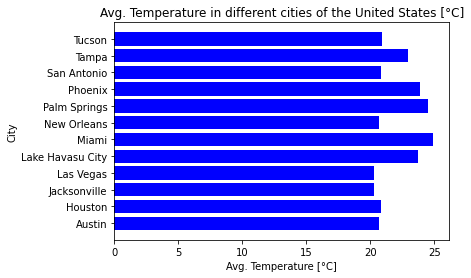

In [262]:
import matplotlib.pyplot as plt


Max_average_Temperature = df_Temperatures["Avg_C_Year"].max()
print("Max. Average Value: " + str(Max_average_Temperature) + "°C.")

df_Temperatures_plot = df_Temperatures[df_Temperatures.Avg_C_Year > 20]

plt.title("Avg. Temperature in different cities of the United States [°C]")
plt.ylabel("City")
plt.xlabel("Avg. Temperature [°C]")
plt.barh(df_Temperatures_plot['City'], df_Temperatures_plot['Avg_C_Year'], color="blue")
plt.show()



With 24.9°C Miami is the city of our choice to open a juice bar.

## Step 3:

After finding the right city to open our juice bar, we check the Wikipedia-entry of Miami neighborhoods and save it in a Panda dataframe.



In [266]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami'

df = pd.read_html(wiki_url)[0]
df_Miami = df[df['Coordinates'].notna()] # Focus on neighborhoods with valid coordinates
df_Miami

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283
6,Design District,NaN,3573,3623,NaN,25.813-80.193
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316


Split column "Coordinate" in latitude and longitude.

In [268]:
df_Miami['latitude'], df_Miami['longitude'] = df_Miami['Coordinates'].str[:6], df_Miami['Coordinates'].str[6:]
df_Miami

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,latitude,longitude
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224,25.815,-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,25.799,-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,25.758,-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,25.813,-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,25.712,-80.257
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283,25.750,-80.283
6,Design District,NaN,3573,3623,NaN,25.813-80.193,25.813,-80.193
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193,25.774,-80.193
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190,25.802,-80.190
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316,25.762,-80.316


## Step 4:

Now we visualize the neighborhoods in Miami with a folium map. We use Nominatim to get the coordinates of Miami to center the map.

In [270]:
# Import necessary library
#!pip install folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium 

print('Libraries imported.')

Libraries imported.


In [272]:
address = 'Miami'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7741728, -80.19362.


In [274]:
# create map of Miami using latitude and longitude values

map_miami = folium.Map(location=[latitude, longitude], zoom_start=12, width=800,height=800)

# add markers to map
for lat, lng, neighborhood, population in zip(df_Miami['latitude'], df_Miami['longitude'], df_Miami['Neighborhood'], df_Miami['Population2010']): 
    label = 'Neigbourhood: {},Population 2010: {}'.format(neighborhood, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

## Step 5:

In the next step we use a Foursquare-API to explore the neighborhoods and it's venues.

In [275]:
# Foursquare API
CLIENT_ID = 'SZI2XYZ3QDBR1Y04O0ZXPLZF1GS5UR31VHC5QB3VXKRBMKEE' # Put Your Client Id
CLIENT_SECRET = 'GRAI545U2IZM001YHKKWGOVOQMXHZNFXMCZDP5CHWEL11CVV' # Put You Client Secret 
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: Hidden')
print('CLIENT_SECRET: Hidden')

Your credentials:
CLIENT_ID: Hidden
CLIENT_SECRET: Hidden


In [276]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [277]:
df = df_Miami
miami_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['latitude'],longitudes=df['longitude'])

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [60]:
print(miami_venues.shape)
miami_venues.head()

(360, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
1,Arts & Entertainment District,25.799,-80.190,Bunnie Cakes,25.799544,-80.190953,Cupcake Shop
2,Arts & Entertainment District,25.799,-80.190,Yodi's Threading Spa,25.800490,-80.189093,Spa
3,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
4,Arts & Entertainment District,25.799,-80.190,Staples,25.797447,-80.188860,Paper / Office Supplies Store


In [61]:
miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,1,1,1,1,1,1
Arts & Entertainment District,17,17,17,17,17,17
Brickell,30,30,30,30,30,30
Buena Vista,30,30,30,30,30,30
Coconut Grove,3,3,3,3,3,3
Coral Way,10,10,10,10,10,10
Design District,30,30,30,30,30,30
Downtown,30,30,30,30,30,30
Edgewater,30,30,30,30,30,30


In [278]:
print('There are {} uniques categories.'.format(len(miami_venues['Venue Category'].unique())))

There are 128 uniques categories.


## Step 6:

Now we are able to analyze each Neighborhood. 

Therefore we use "One hot encoding", this is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction or clustering.

In [279]:
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()

,Yoga Studio,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Big Box Store,Bistro,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Event Space,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,History Museum,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Latin American Restaurant,Lawyer,Leather Goods Store,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Moving Target,Museum,Neighborhood,New American Restaurant,Nightclub,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plaza,Print Shop,Pub,Public Art,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
print(miami_onehot.shape)

(365, 128)


In [314]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped


,Neighborhood,Yoga Studio,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Big Box Store,Bistro,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Event Space,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,History Museum,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Latin American Restaurant,Lawyer,Leather Goods Store,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Moving Target,Museum,New American Restaurant,Nightclub,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plaza,Print Shop,Pub,Public Art,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Arts & Entertainment District,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,0.000000,0.000000,0.055556,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000,0.000000,0.000000,0.000000,0.000000,0.166667,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Brickell,0.

In [282]:
miami_grouped.shape

(24, 128)

## Step 7:

We are just interested in the top-venues per neighborhood, so we use a for-slope to identifiy this Top-List and sort it by frequency.

In [283]:
num_top_venues = 5
for neigh in miami_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = miami_grouped[miami_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
               venue  freq
0  Convenience Store   1.0
1        Pizza Place   0.0
2     Pilates Studio   0.0
3           Pharmacy   0.0
4          Pet Store   0.0


----Arts & Entertainment District----
              venue  freq
0        Restaurant  0.17
1    Ice Cream Shop  0.11
2  Tapas Restaurant  0.06
3               Gym  0.06
4        Food Truck  0.06


----Brickell----
                    venue  freq
0                   Hotel  0.17
1      Italian Restaurant  0.10
2     Japanese Restaurant  0.07
3  Argentinian Restaurant  0.07
4                  Lounge  0.03


----Buena Vista----
                venue  freq
0                Café  0.10
1       Jewelry Store  0.07
2            Boutique  0.07
3  Italian Restaurant  0.07
4          Art Museum  0.07


----Coconut Grove----
           venue  freq
0           Park   0.5
1  Boat or Ferry   0.5
2    Yoga Studio   0.0
3    Pizza Place   0.0
4       Pharmacy   0.0


----Coral Way----
               venue  freq
0       Liquo

In [284]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [285]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = miami_grouped['Neighborhood']

for ind in np.arange(miami_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(miami_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(24, 11)

## Step 8:

Now we use the k-means-algorithm to cluster the Neighborhoods.

In [286]:
from sklearn.cluster import KMeans
import sklearn.cluster.k_means_
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
  verbose=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [287]:
kclusters = 10
miami_grouped_clustering = miami_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(miami_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[1 0 0 0 2 0 0 0 0 9]
24


In [288]:
df.head()

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,latitude,longitude
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224,25.815,-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,25.799,-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,25.758,-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,25.813,-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,25.712,-80.257


In [289]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
miami_merged = df
miami_merged = miami_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

miami_merged.head()

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224,25.815,-80.224,1,Convenience Store,Women's Store,Food,Cuban Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,25.799,-80.190,0,Restaurant,Ice Cream Shop,Gym,Food Truck,Park,Cupcake Shop,Pizza Place,Café,Salon / Barbershop,Sandwich Place
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,25.758,-80.193,0,Hotel,Italian Restaurant,Argentinian Restaurant,Japanese Restaurant,Pharmacy,Latin American Restaurant,Restaurant,Salon / Barbershop,Juice Bar,Scenic Lookout
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,25.813,-80.192,0,Café,Boutique,Italian Restaurant,Coffee Shop,Art Museum,Jewelry Store,Nightclub,Cosmetics Shop,Mediterranean Restaurant,Pizza Place
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,25.712,-80.257,2,Park,Boat or Ferry,Women's Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar


## Step 9:

Finally we visualize the resulting clusters with folium. 

In [304]:
miami_merged

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224,25.815,-80.224,1,Convenience Store,Women's Store,Food,Cuban Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190,25.799,-80.190,0,Restaurant,Ice Cream Shop,Gym,Food Truck,Park,Cupcake Shop,Pizza Place,Café,Salon / Barbershop,Sandwich Place
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193,25.758,-80.193,0,Hotel,Italian Restaurant,Argentinian Restaurant,Japanese Restaurant,Pharmacy,Latin American Restaurant,Restaurant,Salon / Barbershop,Juice Bar,Scenic Lookout
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192,25.813,-80.192,0,Café,Boutique,Italian Restaurant,Coffee Shop,Art Museum,Jewelry Store,Nightclub,Cosmetics Shop,Mediterranean Restaurant,Pizza Place
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257,25.712,-80.257,2,Park,Boat or Ferry,Women's Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, Historic...",25.750-80.283,25.750,-80.283,0,Liquor Store,Pharmacy,Golf Course,Monument / Landmark,Burger Joint,Food Truck,Café,Dive Bar,Mobile Phone Shop,Discount Store
6,Design District,NaN,3573,3623,NaN,25.813-80.193,25.813,-80.193,0,Café,Clothing Store,Boutique,Jewelry Store,Art Museum,Coffee Shop,Italian Restaurant,Mediterranean Restaurant,Leather Goods Store,Cocktail Bar
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193,25.774,-80.193,0,Italian Restaurant,Hotel,Cocktail Bar,Sandwich Place,Salon / Barbershop,Brazilian Restaurant,Breakfast Spot,Print Shop,Café,Pharmacy
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190,25.802,-80.190,0,Restaurant,Coffee Shop,Cuban Restaurant,Art Gallery,Cupcake Shop,Breakfast Spot,Greek Restaurant,New American Restaurant,Yoga Studio,Soccer Field
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316,25.762,-80.316,9,Seafood Restaurant,Peruvian Restaurant,Pet Store,Food,Cuban Restaurant,Department Store,Spanish Restaurant,Fast Food Restaurant,Bakery,Dog Run


In [291]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, width=800,height=800)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['latitude'], miami_merged['longitude'], miami_merged['Neighborhood'],kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [316]:
df_results = miami_merged.loc[(miami_merged["Cluster Labels"] == 0,("Neighborhood","Sub-neighborhoods","Cluster Labels","Population2010"))]
#adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
df_results

,Neighborhood,Sub-neighborhoods,Cluster Labels,Population2010
1,Arts & Entertainment District,NaN,0,11033
2,Brickell,West Brickell,0,31759
3,Buena Vista,Buena Vista East Historic District and Design ...,0,9058
5,Coral Way,"Coral Gate, Golden Pines, Shenandoah, Historic...",0,35062
6,Design District,NaN,0,3573
7,Downtown,"Brickell, Central Business District (CBD), Dow...",0,"71,000 (13,635 CBD only)"
8,Edgewater,NaN,0,15005
13,Little Haiti,Lemon City (aka Little River),0,29760
16,Midtown,Edgewater and Wynwood,0,-
18,Park West,NaN,0,4655


In [317]:
Neighborhoods_with_Juicebars = miami_grouped.loc[(miami_grouped["Juice Bar"] > 0,"Neighborhood")]
Neighborhoods_with_Juicebars

2      Brickell
8     Edgewater
23      Wynwood
Name: Neighborhood, dtype: object

The result of the k-mean algorithm is that neigborhoods with juice bars were combined into cluster 0. Additional to that, only the three Neigborhoods Brickell, Edgewater and Wynwood already have juice bars. 

We had two site selection conditions:
- Cluster, which corresponds to the cluster with which Neighborhoods with juice bars classify (--> Cluster 0).
- Neighborhood, which does not yet have a juice bar.

This leads to our Neighborhood recommendation: 
Arts & Entertainment District
Downtown
Edgewater
Little Haiti
Midtown
Park West	
The Roads
Upper Eastside
West Flagler

### 4. Results and Discussion


Macro Analysis:
In addition to the city of Miami, other cities can certainly be considered that have comparable conditions (warm temperatures throughout the year).
In addition, not only cities should be considered, but possibly also smaller suburbs, which often bring lower rental costs.

Microanalysis:
Cluster 0, which includes neighborhoods with existing juice bars, offers good conditions. 
Due to the tradeoff between high rental costs and a location that guarantees a high volume of visitors, good reasons can also be found for the other clusters.
For example, a neighborhood that is located further away from the tourist hotspot would probably be more favorable in terms of rental costs. At the same time, however, the customers would probably be more "locals", which has an impact on pricing. While tourists are willing to pay more for a drink on their vacation, the price-performance ratio has to be right for the locals so that they will come back. With the tourist target group, it's not a matter of whether customers come back, but how many walk-in customers pass by the juice bar. 



### 5. Conclusion

Using macro-analysis, we were able to find a city that has warm temperatures year-round. This is initially the basic prerequisite for operating a juice bar without seasonal closures. 
Using the k-means algorithm, we were able to identify those clusters that already have juice bars and are therefore potentially eligible Neighborhoods to open a juice bar. 
We can conclude for these clusters that a juice bar is profitable. This can be justified by the framework that led the k-means algorithm to cluster these Neighborhoods. 
Without knowing the concrete framework conditions, it can be said that a juice bar probably only lasts where many people stay (be it for tourist reasons, or because of their work or their place of residence).
Miami is not only a large city with many inhabitants and warm temperatures, but also a tourist stronghold. 
With this choice of location, the trade-off between high rental costs and a high number of visitors at the same time must be considered in a further analysis.



